<a href="https://colab.research.google.com/github/rahulsingh731/Garden-Nerd-Flower-Recognition-Data-Science-Competition/blob/master/Garden_CHallenge_TRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip

--2019-09-10 03:45:34--  https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip
Resolving he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)... 52.219.36.79
Connecting to he-public-data.s3-ap-southeast-1.amazonaws.com (he-public-data.s3-ap-southeast-1.amazonaws.com)|52.219.36.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 948965311 (905M) [application/zip]
Saving to: ‘HE_Challenge_data.zip’

HE_Challenge_data.z 100%[===================>] 905.00M  10.5MB/s    in 89s     

2019-09-10 03:47:05 (10.1 MB/s) - ‘HE_Challenge_data.zip’ saved [948965311/948965311]



In [2]:
!unzip HE_Challenge_data.zip

Archive:  HE_Challenge_data.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
   creating: data/test/
  inflating: data/test/.DS_Store     
  inflating: data/test/18540.jpg     
  inflating: data/test/18541.jpg     
  inflating: data/test/18542.jpg     
  inflating: data/test/18543.jpg     
  inflating: data/test/18544.jpg     
  inflating: data/test/18545.jpg     
  inflating: data/test/18546.jpg     
  inflating: data/test/18547.jpg     
  inflating: data/test/18548.jpg     
  inflating: data/test/18549.jpg     
  inflating: data/test/18550.jpg     
  inflating: data/test/18551.jpg     
  inflating: data/test/18552.jpg     
  inflating: data/test/18553.jpg     
  inflating: data/test/18554.jpg     
  inflating: data/test/18555.jpg     
  inflating: data/test/18556.jpg     
  inflating: data/test/18557.jpg     
  inflating: data/test/18558.jpg     
  inflating: data/test/18559.jpg     
  inflating: data/test/18560.jpg     
  inflating: data/test/18561

In [3]:
import cv2
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPool2D, Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_directory = 'data/train'
test_directory = 'data/test'

In [5]:
df = pd.read_csv('data/train.csv')
df.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


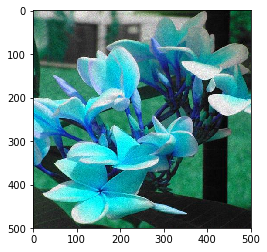

In [6]:
img = cv2.imread('data/train/1.jpg')
plt.imshow(img)

In [7]:
img.shape

(500, 500, 3)

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [0]:
df['category'] = df['category'].astype(str)
df['image_id'] = df['image_id'].astype(str)
for i in range(len(df['image_id'])):
  df['image_id'][i]=df['image_id'][i]+'.jpg'

In [10]:
df.head()

,image_id,category
0,0.jpg,77
1,1.jpg,81
2,2.jpg,52
3,3.jpg,72
4,4.jpg,58


In [11]:
train_generator = train_datagen.flow_from_dataframe(
    df,
    directory = train_directory,
    subset = 'training',
    x_col = 'image_id',
    y_col = 'category',
    target_size = (32,32),
    class_mode = 'categorical'
)
test_generator = train_datagen.flow_from_dataframe(
    df,
    directory = train_directory,
    subset = 'validation',
    x_col = 'image_id',
    y_col = 'category',
    target_size = (32,32),
    class_mode = 'categorical'
)

Found 15759 validated image filenames belonging to 102 classes.
Found 2781 validated image filenames belonging to 102 classes.


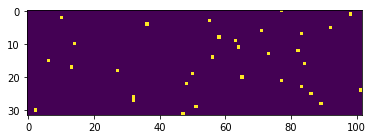

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3) ,activation = 'relu', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(102, activation = 'sigmoid'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         


In [13]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(), 
    metrics = ['accuracy']
)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# history = model1.fit_generator(
#     train_generator,
#     steps_per_epoch = 2000,
#     epochs = 1,
#     validation_data = test_generator,
#     validation_steps = 64
# )
from keras.models import load_model
model1=load_model('model.h5')

In [50]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,image_id,category
0,18540,NaN
1,18541,NaN
2,18542,NaN
3,18543,NaN
4,18544,NaN


In [0]:
x = test_df['image_id']
test_Dataset = []
def make_test_data(path):
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img_res = cv2.resize(img, (32,32))
    img_array = img_to_array(img_res)
    img_array = img_array/255
    test_Dataset.append(img_array)

In [0]:
from tqdm  import tqdm
from keras.preprocessing.image import img_to_array

In [55]:
# for id_code in tqdm(x):
#     path = os.path.join(test_directory,'{}.jpg'.format(id_code))
#     make_test_data(path)
# test_image = np.array(test_Dataset)
# pred=model1.predict(test_image)
# pred.shape
# pred=np.argmax(pred,axis=1)
pred.shape

(2009,)

In [0]:
df=pd.DataFrame({'image_id':x,'category':pred})
df.to_csv('my_submission',index=False)

**Save Our Model for backup(as training takes long time )**

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [16]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 8.7MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()          
drive = GoogleDrive(gauth)

In [0]:
# model.save('model.h5')
# model_file = drive.CreateFile({'title' : 'model.h5'})                       
# model_file.SetContentFile('model.h5')                       
# model_file.Upload()

In [0]:
# # download to google drive                       
# drive.CreateFile({'id': model_file.get('id')})

In [0]:
file_obj = drive.CreateFile({'id': '15XR5w-j9QJ6VSytuuhraNuf78jefQqjq'})                       
file_obj.GetContentFile('model.h5')

In [0]:
# file_obj = drive.CreateFile({'id': '15XR5w-j9QJ6VSytuuhraNuf78jefQqjq'}) 

In [59]:
pd.read_csv('my_submission')

,image_id,category
0,18540,96
1,18541,75
2,18542,91
3,18543,89
4,18544,50
5,18545,13
6,18546,1
7,18547,23
8,18548,100
9,18549,23
